# Tunning MultiClass Classifier Models - For CInc

## Importing Libraries

In [2]:
import pandas as pd
rs = 42
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import loguniform as sp_loguniform
from sklearn.model_selection import KFold,StratifiedKFold
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
rs = 42
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score,make_scorer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend
#pip install scikit-plot
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from numpy import mean, std
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# created functions
from evaluation import cross_validation_report,print_confusion_matrix,cross_validation_report_reg,nulls,boxplot_metrics, time_bar_chart,cv_report_4classes, test_validation_mult, multi_class_auc_plot

## Importing Data

In [3]:
# Check current working directory.
retval = os.getcwd()
print ("Current working directory %s" % retval)

Current working directory /Volumes/GoogleDrive/My Drive/MCCNotes/Jlab projects/GITHUB_repositories/DANY_repositories/alumni_work/Clasification


In [4]:
# importing dataset
dataset_l_tr = pd.read_csv('../Preprocessing/preprocess_files/df4_tr_l.csv')
dataset_l_ho = pd.read_csv('../Preprocessing/preprocess_files/df4_ho_l.csv')
dataset_l_tr.drop(['Donates','Volunteers'], axis = 1, inplace = True)
dataset_l_ho.drop(['Donates','Volunteers'], axis = 1, inplace = True)

In [6]:
# split the data into X and Y
y_ltr_c = dataset_l_tr['quant'].copy()
y_ltr_r = dataset_l_tr['CInc'].copy()
X_ltr = dataset_l_tr.drop(['CInc','quant'],axis=1).copy()

y_lho_c = dataset_l_ho['quant'].copy()
y_lho_r = dataset_l_ho['CInc'].copy()
X_lho = dataset_l_ho.drop(['CInc','quant'],axis=1).copy()

In [7]:
cv = StratifiedKFold(n_splits=10, random_state=rs, shuffle = True)

## Models

### LDA Tunning

### Random Forest Tunning

In [74]:
est = RandomForestClassifier(n_jobs = -1, random_state = rs)
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_rf = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_rf.append(X_ltr.columns[i]) 

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 31.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 30.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 27.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected True, Rank: 1.000
Column: TeamWork_Imp, Selected True, Rank: 1.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected True, Rank: 1.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 58.000
Column: Board_Member, Selected False, Rank: 26.000
Column: NonProfit_Business, Selected False, Rank: 48.000
Column

In [16]:
selected_rf = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Negotiation_Imp',
 'TeamWork_Imp',
 'Innovation_Imp',
 'Communication_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Volunteers',
 'Love_relationships',
 'Help_Professional',
 'MO_Housewive',
 'FInd_Quaternary',
 'FInc',
 'work_hours_week']

In [116]:
rf_grid_search= GridSearchCV(estimator = est, param_grid={ 'min_samples_split': [2,4,6,8], 'n_estimators': [10, 100, 500,1000], 'min_samples_leaf': [2,4,6,8],'criterion':['entropy','gini']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
rf_grid_win = rf_grid_search.fit(X_ltr[selected_rf], y_ltr_c)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed: 56.6min finished


In [117]:
# Get the estimator
best_clf_rf = rf_grid_win.best_estimator_
best_clf_rf
#results in data frame
rf_results = pd.DataFrame(rf_grid_win.cv_results_)
# show the first 5 rows
display(rf_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.543233,0.148161,0.120609,0.030481,entropy,2,2,10,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.467832,...,0.448951,0.466434,0.442657,0.454545,0.463636,0.472028,0.452064,0.458283,0.008922,125
1,3.456564,0.274353,0.109214,0.004632,entropy,2,2,100,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.495804,...,0.481119,0.498601,0.485315,0.484615,0.497203,0.496503,0.487754,0.492552,0.007651,95
2,16.832749,0.915614,0.401918,0.123644,entropy,2,2,500,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.499301,...,0.483217,0.512587,0.497902,0.495804,0.506294,0.499301,0.490553,0.498566,0.007575,63
3,31.849929,0.263883,0.683715,0.143133,entropy,2,2,1000,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.495105,...,0.479021,0.502797,0.501399,0.499301,0.506993,0.506294,0.490553,0.498006,0.007888,71
4,0.264237,0.048804,0.108528,0.003519,entropy,2,4,10,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.467832,...,0.448951,0.466434,0.442657,0.453846,0.463636,0.472028,0.451365,0.458143,0.009004,126


In [118]:
rf_scores = np.array(rf_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (rf_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (rf_grid_win.best_score_)

Best gridsearch parameters
------
{'criterion': 'gini', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 500}
----------
Best score
------
0.5042307936989532


In [12]:
# Save the object in a python file
#import pickle
#with open('tuned_models/binary_rfc_model_win.data','wb') as data:
    #pickle.dump(rf_grid_win, data)
#with open('tuned_models/binary_rfc_model_grid.data','wb') as data:
    #pickle.dump(rf_grid_search, data)

In [17]:
rf_mult = RandomForestClassifier(random_state = rs, criterion = 'entropy', min_samples_split=2, min_samples_leaf = 8, n_estimators=500)

### Lasso Logistic Regression

In [88]:
# Create cross-validated logistic regression
c_values = np.linspace(0.001, 0.06, 100)
clf = LogisticRegressionCV(random_state=rs, penalty = 'l1', solver = 'liblinear',  verbose = 2, n_jobs=-1 , Cs=c_values, cv = cv, multi_class='ovr')
# Train model
clf_grid_win= clf.fit(X_ltr, y_ltr_c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 18.2min finished
[LibLinear][LibLinear][LibLinear][LibLinear]

In [97]:
clf_grid_win.C_

array([0.04986869, 0.001     , 0.001     , 0.06      ])

Text(0, 0.5, 'Mean CV-accuracy')

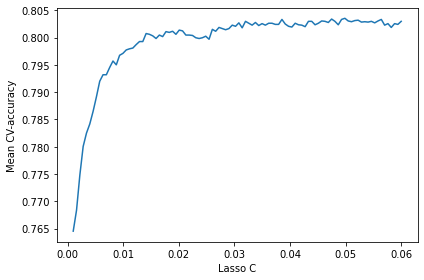

In [95]:
plt.plot(c_values, np.mean(clf_grid_win.scores_[0], axis=0))
plt.xlabel('Lasso C')
plt.ylabel('Mean CV-accuracy')

In [101]:
lr = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C = [0.04986869, 0.001     , 0.001     , 0.06      ])

In [104]:
lr_grid_search= GridSearchCV(estimator = lr, param_grid={'solver' : ['liblinear', 'saga','newton-cg', 'lbfgs', 'sag']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lr_grid_win = lr_grid_search.fit(X_ltr, y_ltr_c)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished
[LibLinear]

In [105]:
# Get the estimator
best_clf_lr = lr_grid_win.best_estimator_
best_clf_lr
#results in data frame
lr_results = pd.DataFrame(lr_grid_win.cv_results_)
# show the first 5 rows
display(lr_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.816384,4.531215,0.007429,0.00873,liblinear,{'solver': 'liblinear'},0.509790,0.492308,0.502797,0.486713,0.488811,0.491608,0.493706,0.501399,0.499301,0.498950,0.496538,0.00677,1
1,14.939293,2.066036,0.001889,0.00025,saga,{'solver': 'saga'},0.283217,0.283916,0.268531,0.276224,0.276224,0.286014,0.276224,0.283916,0.292308,0.277817,0.280439,0.00637,2
2,0.024384,0.029677,0.000000,0.00000,newton-cg,{'solver': 'newton-cg'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3
3,0.027538,0.025402,0.000000,0.00000,lbfgs,{'solver': 'lbfgs'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3
4,0.057561,0.064563,0.000000,0.00000,sag,{'solver': 'sag'},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3


In [106]:
lr_scores = np.array(lr_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_grid_win.best_score_)

Best gridsearch parameters
------
{'solver': 'liblinear'}
----------
Best score
------
0.49653838813390944


In [108]:
means = lr_grid_win.cv_results_['mean_test_score']
stds = lr_grid_win.cv_results_['std_test_score']
params = lr_grid_win.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.496538 (0.006770) with: {'solver': 'liblinear'}
0.280439 (0.006370) with: {'solver': 'saga'}
0.000000 (0.000000) with: {'solver': 'newton-cg'}
0.000000 (0.000000) with: {'solver': 'lbfgs'}
0.000000 (0.000000) with: {'solver': 'sag'}


In [6]:
lr  = LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C = 0.06, solver = 'liblinear')

In [10]:
#sel_ = SelectFromModel(lr, max_features = 20)
#sel_= RFE(lr, n_features_to_select=  20)
#sel_.fit(X_ltr, y_ltr_c)
#selected_feat_lr = X_ltr.columns[(sel_.get_support())]
#selected_feat_lr

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

RFE(estimator=LogisticRegression(C=0.06, multi_class='ovr', n_jobs=-1,
                                 penalty='l1', random_state=42,
                                 solver='liblinear', verbose=2),
    n_features_to_select=20)

In [8]:
selected_feat_lr = ['Gender', 'Years_Worked_Foreign', 'Senior_Position', 'People_in_Charge',
       'No_Created_Ventures', 'Donates', 'Pos_Grad_Degree', 'Nationality_For',
       'School_Other', 'Campus_MTY', 'Curr_Loc_Foreign', 'Curr_Loc_Other',
       'ccsize_large', 'ccsize_self', 'ccsize_small', 'CurrE_Employee',
       'CurrE_Manager', 'CurrE_Owner_Freelancer', 'CurrE_Senior Manager',
       'CInd_Tertiary']

In [7]:
sbs = SFS(lr, 
          k_features=20, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

In [10]:
sbs = sbs.fit(X_ltr, y_ltr_c)
print('\nSequential Backward Selection (k=20):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=20):
(2, 3, 4, 7, 15, 19, 24, 29, 33, 39, 44, 62, 65, 67, 68, 69, 70, 74, 75, 76)
CV Score:
0.5013634773760691


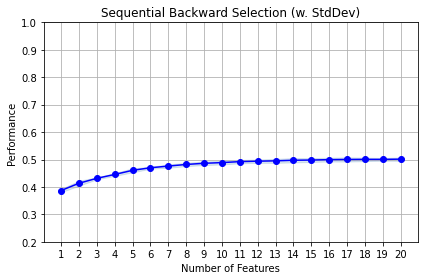

In [11]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.2, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [13]:
selected_feat_lr = X_ltr.columns[[sbs.k_feature_idx_]]
selected_feat_lr

Index(['Age', 'Gender', 'Scholarship_Percent', 'Years_Worked_Foreign',
       'No_Created_Ventures', 'Donates', 'Business_partner', 'Nationality_For',
       'Campus_Centro', 'Curr_Loc_Foreign', 'FO_Freelancer or Contractor',
       'ccsize_large', 'ccsize_self', 'CurrE_Employee', 'CurrE_Manager',
       'CurrE_Owner_Freelancer', 'CurrE_Senior Manager', 'CInd_Tertiary',
       'FInc', 'work_hours_week'],
      dtype='object')

In [14]:
selected_feat_lr = ['Age', 'Gender', 'Scholarship_Percent', 'Years_Worked_Foreign',
       'No_Created_Ventures', 'Donates', 'Business_partner', 'Nationality_For',
       'Campus_Centro', 'Curr_Loc_Foreign', 'FO_Freelancer or Contractor',
       'ccsize_large', 'ccsize_self', 'CurrE_Employee', 'CurrE_Manager',
       'CurrE_Owner_Freelancer', 'CurrE_Senior Manager', 'CInd_Tertiary',
       'FInc', 'work_hours_week']

In [15]:
lr.fit(X_ltr[selected_feat_lr],y_ltr_c)
lr.score(X_ltr[selected_feat_lr], y_ltr_c)

[LibLinear]

0.5032519756626338

In [18]:
lr_mult =LogisticRegression(random_state=rs, penalty = 'l1', verbose = 2, n_jobs = -1,multi_class='ovr', C = 0.06, solver = 'liblinear')

In [13]:
# Create cross-validated logistic regression
clf_rd = LogisticRegressionCV(random_state=rs, penalty = 'l2',  verbose = 2, n_jobs=-1 , Cs=np.linspace(0.001, 0.06, 100), cv = cv)
# Train model
clf_rd_grid_win= clf_rd.fit(X_ltr[selected_feat_lr], y_ltr_c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.1s finished


In [15]:
np.min(clf_rd_grid_win.C_)

0.044505050505050506

Text(0, 0.5, 'Mean CV-accuracy')

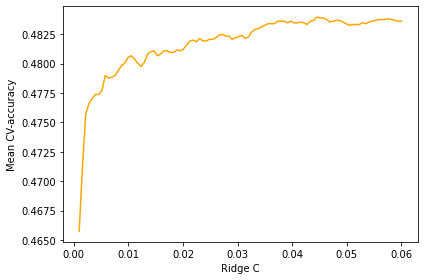

In [16]:
c_values = np.linspace(0.001, 0.06, 100)
plt.plot(c_values, np.mean(clf_rd_grid_win.scores_[1], axis=0) , color = 'orange')
plt.xlabel('Ridge C')
plt.ylabel('Mean CV-accuracy')

In [17]:
lr_rd_grid_search= GridSearchCV(estimator = lr_mult , param_grid={'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lr_rd_grid_win = lr_rd_grid_search.fit(X_ltr[selected_feat_lr], y_ltr_c)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [18]:
# Get the estimator
best_clf_lr_rd = lr_rd_grid_win.best_estimator_
best_clf_lr_rd
#results in data frame
lr_rd_results = pd.DataFrame(lr_rd_grid_win.cv_results_)
# show the first 5 rows
display(lr_rd_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.295700,0.026869,0.005711,0.004628,liblinear,{'solver': 'liblinear'},0.480420,0.500000,0.493706,0.475524,0.462238,0.493706,0.466434,0.464336,0.481818,0.475157,0.479334,0.012503,5
1,0.743562,0.030791,0.003223,0.000205,newton-cg,{'solver': 'newton-cg'},0.488112,0.495105,0.488811,0.479720,0.472727,0.484615,0.474126,0.464336,0.493007,0.498950,0.483951,0.010478,1
2,0.676259,0.080762,0.002561,0.000436,lbfgs,{'solver': 'lbfgs'},0.488112,0.495105,0.488811,0.479720,0.472727,0.484615,0.474126,0.464336,0.493007,0.498950,0.483951,0.010478,1
3,0.468690,0.067442,0.002961,0.000195,sag,{'solver': 'sag'},0.488112,0.495105,0.488811,0.479720,0.472727,0.484615,0.474126,0.464336,0.493007,0.498950,0.483951,0.010478,1
4,0.347355,0.080730,0.002882,0.000513,saga,{'solver': 'saga'},0.488112,0.495105,0.488811,0.479720,0.472727,0.484615,0.474126,0.464336,0.493007,0.498950,0.483951,0.010478,1


In [19]:
lr_rd_scores = np.array(lr_rd_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lr_rd_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lr_rd_grid_win.best_score_)

Best gridsearch parameters
------
{'solver': 'newton-cg'}
----------
Best score
------
0.4839509755464969


In [20]:
lr_rd.fit(X_ltr[selected_feat_lr],y_ltr_c)
lr_rd.score(X_ltr[selected_feat_lr], y_ltr_c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


0.48576823554094695

In [21]:
means = lr_rd_grid_win.cv_results_['mean_test_score']
stds = lr_rd_grid_win.cv_results_['std_test_score']
params = lr_rd_grid_win.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.479334 (0.012503) with: {'solver': 'liblinear'}
0.483951 (0.010478) with: {'solver': 'newton-cg'}
0.483951 (0.010478) with: {'solver': 'lbfgs'}
0.483951 (0.010478) with: {'solver': 'sag'}
0.483951 (0.010478) with: {'solver': 'saga'}


### Light Gradient Boosting Tunning

In [22]:
# Load the object
#import pickle
#with open('tuned_models/binary_lgb_model_win.data','rb') as data:
    #lgb_grid_win= pickle.load(data)
#with open('tuned_models/binary_lgb_model_grid.data','rb') as data:
    #lgb_grid_search= pickle.load(data)

In [56]:
est = LGBMClassifier(random_state = rs, objective = 'multiclass')
rfe = RFE(est, n_features_to_select=  20)
rfe.fit(X_ltr, y_ltr_c)
selected_lgb = []
for i in range(X_ltr.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_ltr.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True: 
        selected_lgb.append(X_ltr.columns[i])   

Column: Bachelor_GPA, Selected True, Rank: 1.000
Column: Bachelor_Honors, Selected False, Rank: 41.000
Column: Age, Selected True, Rank: 1.000
Column: Gender, Selected True, Rank: 1.000
Column: Scholarship_Percent, Selected True, Rank: 1.000
Column: First_Comp_Size, Selected True, Rank: 1.000
Column: Country_First_Job, Selected False, Rank: 31.000
Column: Years_Worked_Foreign, Selected True, Rank: 1.000
Column: Senior_Position, Selected False, Rank: 14.000
Column: People_in_Charge, Selected True, Rank: 1.000
Column: Negotiation_Imp, Selected False, Rank: 3.000
Column: TeamWork_Imp, Selected False, Rank: 11.000
Column: Innovation_Imp, Selected True, Rank: 1.000
Column: Communication_Imp, Selected False, Rank: 10.000
Column: Planning_Imp, Selected True, Rank: 1.000
Column: No_Created_Ventures, Selected True, Rank: 1.000
Column: Used_Incubator_program, Selected False, Rank: 57.000
Column: Board_Member, Selected False, Rank: 38.000
Column: NonProfit_Business, Selected False, Rank: 48.000
C

In [58]:
selected_lgb

['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Donates',
 'School_Other',
 'Curr_Loc_Foreign',
 'ccsize_large',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [19]:
selected_lgb = ['Bachelor_GPA',
 'Age',
 'Gender',
 'Scholarship_Percent',
 'First_Comp_Size',
 'Years_Worked_Foreign',
 'People_in_Charge',
 'Innovation_Imp',
 'Planning_Imp',
 'No_Created_Ventures',
 'Donates',
 'School_Other',
 'Curr_Loc_Foreign',
 'ccsize_large',
 'CurrE_Employee',
 'CurrE_Manager',
 'CurrE_Senior Manager',
 'CInd_Tertiary',
 'FInc',
 'work_hours_week']

In [62]:
lgb_grid_search= GridSearchCV(estimator = est, param_grid={'max_depth': [2,4,6,8], 'n_estimators': [10, 100, 500], 'num_leaves': [4,16,32,64] , 'learning_rate':list(np.logspace(np.log(0.005), np.log(0.2),base = np.exp(1), num= 10)) }, n_jobs = -1, cv = cv, scoring = 'accuracy', error_score=0, verbose = 2)
lgb_grid_win = lgb_grid_search.fit(X_ltr[selected_lgb], y_ltr_c)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 56.7min finished


In [63]:
# Get the estimator
best_clf_lgb = lgb_grid_win.best_estimator_
best_clf_lgb
#results in data frame
lgb_results = pd.DataFrame(lgb_grid_win.cv_results_)
# show the first 5 rows
display(lgb_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_leaves,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.179934,0.006828,0.008314,0.002867,0.005,2,10,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.267133,...,0.269231,0.268531,0.268531,0.269231,0.268531,0.269930,0.269419,0.268760,0.000718,477
1,0.154811,0.016785,0.018798,0.015086,0.005,2,10,16,"{'learning_rate': 0.005000000000000004, 'max_d...",0.267133,...,0.269231,0.268531,0.268531,0.269231,0.268531,0.269930,0.269419,0.268760,0.000718,477
2,0.111484,0.006037,0.007111,0.000916,0.005,2,10,32,"{'learning_rate': 0.005000000000000004, 'max_d...",0.267133,...,0.269231,0.268531,0.268531,0.269231,0.268531,0.269930,0.269419,0.268760,0.000718,477
3,0.122560,0.018924,0.008939,0.005182,0.005,2,10,64,"{'learning_rate': 0.005000000000000004, 'max_d...",0.267133,...,0.269231,0.268531,0.268531,0.269231,0.268531,0.269930,0.269419,0.268760,0.000718,477
4,0.678344,0.020670,0.020933,0.002154,0.005,2,100,4,"{'learning_rate': 0.005000000000000004, 'max_d...",0.430769,...,0.451049,0.462937,0.444056,0.446154,0.466434,0.443357,0.442967,0.450101,0.010318,421


In [64]:
lgb_scores = np.array(lgb_results.mean_test_score)
print ("Best gridsearch parameters\n------")
print (lgb_grid_win.best_params_)
print ("----------")
print ("Best score\n------")
print (lgb_grid_win.best_score_)

Best gridsearch parameters
------
{'learning_rate': 0.03881533447356429, 'max_depth': 6, 'n_estimators': 500, 'num_leaves': 64}
----------
Best score
------
0.5415060656628187


In [20]:
lgbm_mult = LGBMClassifier(random_state = rs,  max_depth = 6, n_estimators =  500, num_leaves = 64, learning_rate = 0.0388)

In [31]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_ltr, y_ltr_c)
params = { 
    'objective': 'multiclass', 
    'num_class':4, 
    'metric': 'multi_logloss' ,
    'objective' : 'multiclass', 
    'metric' : 'multi_logloss',
    'n_estimators' : 500, 
    'num_leaves' :32, 
    'learning_rates'  : 0.026, 
    'max_depth' :8
} 
clf= lgb.train(params,lgb_train)
y_pred_1=clf.predict(X_lho)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy_score(y_pred_1,y_lho_c).mean()

0.533986013986014

In [251]:
lgbm_mult = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  500, num_leaves = 32, learning_rate = 0.026)
lgbm_mult.fit(X_nltr,y_nltr_c)
pred = lgbm_mult.predict(X_nlho)
accuracy_score(y_nlho_c, pred)

0.5423776223776223

In [252]:
lgbm_mult = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  500, num_leaves = 32, learning_rate = 0.026, objective='multiclass', num_class = 4, metric = 'multi_logloss')
lgbm_mult.fit(X_nltr,y_nltr_c)
pred = lgbm_mult.predict(X_nlho)
accuracy_score(y_nlho_c, pred)

0.5423776223776223

In [257]:
lgbm_mult = LGBMClassifier(random_state = rs,  max_depth = 8, n_estimators =  500, num_leaves = 32, learning_rate = 0.026, objective='multiclassova', num_class = 4, metric = 'multi_logloss')
lgbm_mult.fit(X_nltr,y_nltr_c)
pred = lgbm_mult.predict(X_nlho)
accuracy_score(y_nlho_c, pred)

0.5446153846153846

## Evaluation

In [21]:
classifiers = {}
auc_results = {}
f1_results = {}
acc_results = {}
kappa_results = {}
clf_time = {}
classifiers['acc'] = acc_results
classifiers['f1'] = f1_results
classifiers['auc'] = auc_results
classifiers['kappa'] = kappa_results
classifiers['time'] = clf_time

In [22]:
dummy = DummyClassifier(random_state= rs, strategy = 'uniform') # generates prediction uniformly at random

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/Selected Features
 AUC : 0.7565292277461425
 F1 weighted : 0.4686693284727904
 Accuracy : 0.4993354930583762
 Kappa Statitic : 0.33056439181450453
Process Complete in : 4.345550060272217 sec.


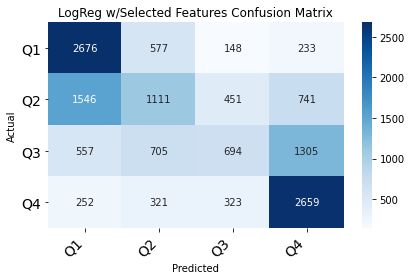

In [23]:
name = 'LogReg w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_feat_lr ],y_ltr_c,lr_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model: LogReg w/All Features
 AUC : 0.7630028895491514
 F1 weighted : 0.47468517472382993
 Accuracy : 0.5030427654920306
 Kappa Statitic : 0.33548966700208566
Process Complete in : 18.621278047561646 sec.


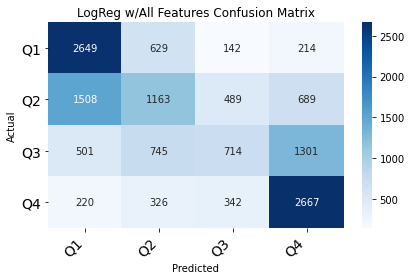

In [24]:
name = 'LogReg w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,lr_mult,cnames =['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/Selected Features
 AUC : 0.762131447434476
 F1 weighted : 0.48711607830623826
 Accuracy : 0.5010842341703083
 Kappa Statitic : 0.3320354929286015
Process Complete in : 89.65732979774475 sec.


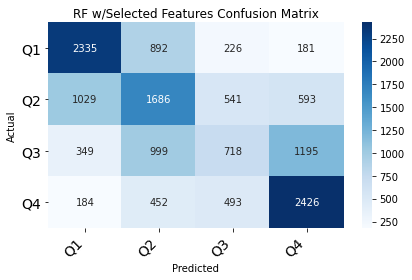

In [25]:
name = 'RF w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_rf],y_ltr_c,rf_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: RF w/All Features
 AUC : 0.8010268187727767
 F1 weighted : 0.5345546656726154
 Accuracy : 0.5481506946517444
 Kappa Statitic : 0.39543910346562805
Process Complete in : 94.47540092468262 sec.


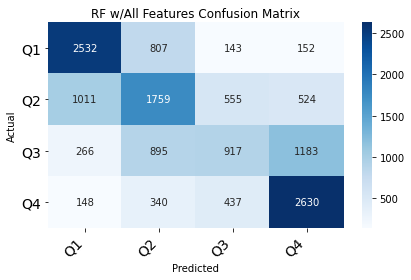

In [26]:
name = 'RF w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_nltr,y_nltr_c,rf_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/Selected Features
 AUC : 0.7958076068613463
 F1 weighted : 0.5299713330187986
 Accuracy : 0.5343730517208474
 Kappa Statitic : 0.37788208830105596
Process Complete in : 415.87263011932373 sec.


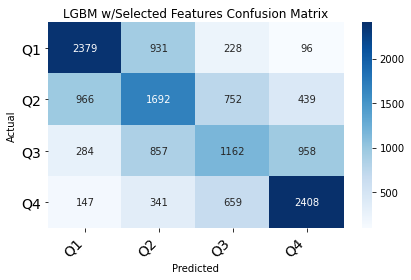

In [27]:
name = 'LGBM w/Selected Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr[selected_lgb],y_ltr_c,lgbm_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: LGBM w/All Features
 AUC : 0.8017259658267466
 F1 weighted : 0.5392854171719186
 Accuracy : 0.5433945201055067
 Kappa Statitic : 0.3900228180422541
Process Complete in : 792.7939577102661 sec.


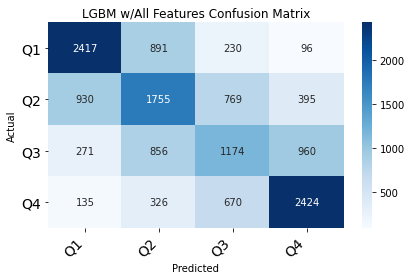

In [28]:
name = 'LGBM w/All Features'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,lgbm_mult,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

Model: Dummy Classifier
 AUC : 0.5
 F1 weighted : 0.24948046225406814
 Accuracy : 0.2490377152588489
 Kappa Statitic : -0.0014993997409658232
Process Complete in : 0.17565417289733887 sec.


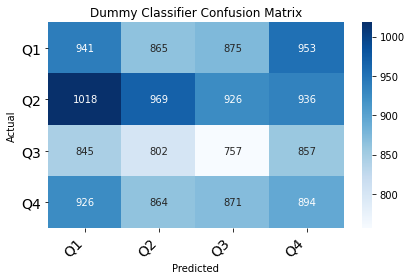

In [29]:
name = 'Dummy Classifier'
(matrix,names), auc_scores, f1_scores, acc_scores, kappa_scores,model_name ,measured_time = cv_report_4classes(X_ltr,y_ltr_c,dummy,cnames = ['Q1','Q2','Q3','Q4'],model_name = name,scale = False)
auc_results[model_name] = auc_scores
f1_results[model_name] = f1_scores
kappa_results[model_name] = kappa_scores
acc_results[model_name] = acc_scores
clf_time[model_name] = measured_time
fig = print_confusion_matrix(matrix,names, model_name = name)
fig.show()

## Hold Out Validation

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

[LibLinear][LibLinear][LibLinear][LibLinear]Accuracy score : 0.48895104895104896
AUC score: 0.7513071613708753
F1 score: 0.46003985062565506
Kappa score: 0.31708461332645477


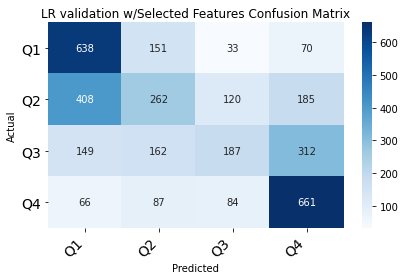

In [31]:
predictions,proba = test_validation_mult(lr_mult,  X_ltr, y_ltr_c, X_lho, selected_feat_lr,True)
model_name = 'LR validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_nlho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear]

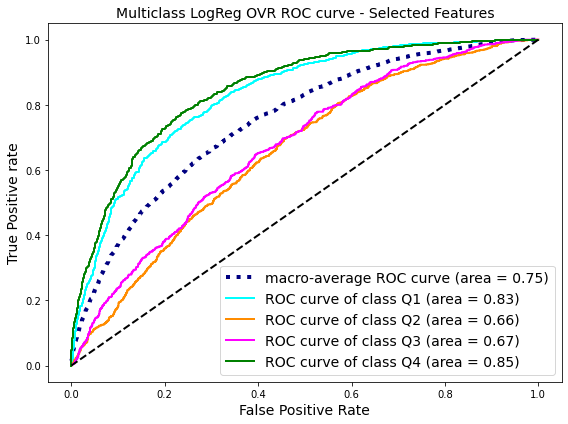

In [32]:
multi_class_auc_plot(lr_mult,X_nltr[selected_feat_lr], y_nltr_c, X_nlho[selected_feat_lr], y_nlho_c, title = 'Multiclass LogReg OVR ROC curve - Selected Features')

[LibLinear][LibLinear][LibLinear][LibLinear]Accuracy score : 0.4967832167832168
AUC score: 0.7608245015517139
F1 score: 0.4688981357845157
Kappa score: 0.3275264919905553


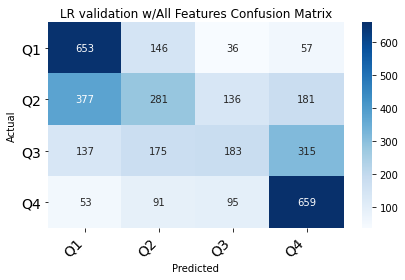

In [33]:
predictions,proba = test_validation_mult(lr_mult,  X_ltr, y_ltr_c, X_lho, False,True)
model_name = 'LR validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_nlho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

[LibLinear][LibLinear][LibLinear][LibLinear]

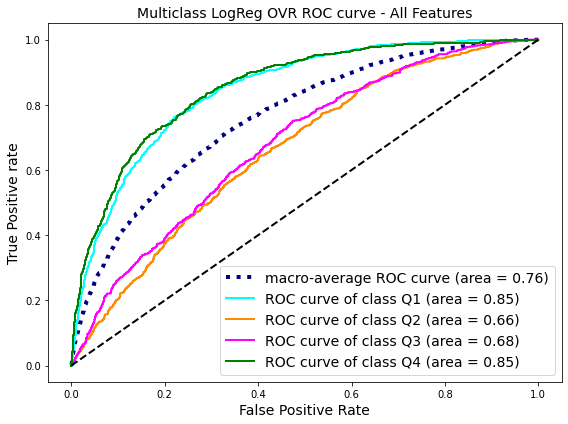

In [34]:
multi_class_auc_plot(lr_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass LogReg OVR ROC curve - All Features')

Accuracy score : 0.49482517482517485
AUC score: 0.7595984879940568
F1 score: 0.4755732346126403
Kappa score: 0.32335030184584845


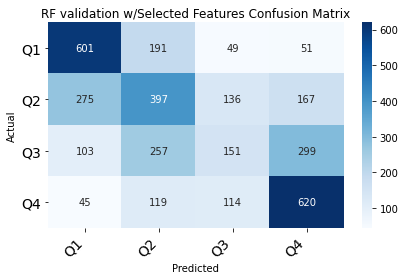

In [35]:
predictions,proba = test_validation_mult(rf_mult, X_ltr, y_ltr_c, X_lho,selected_rf,True)
model_name = 'RF validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_nlho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_nlho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_nlho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

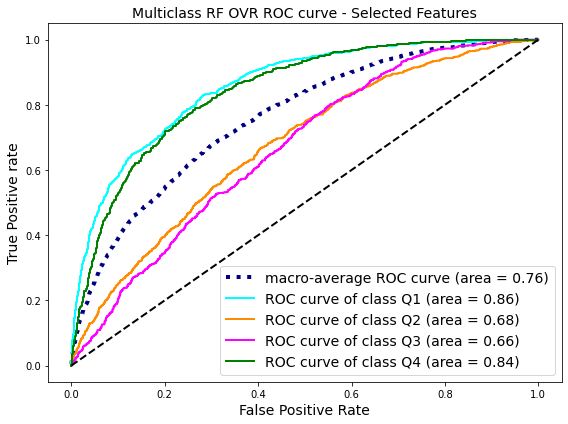

In [36]:
multi_class_auc_plot(rf_mult,X_ltr[selected_rf], y_ltr_c, X_lho[selected_rf], y_lho_c, title = 'Multiclass RF OVR ROC curve - Selected Features')

Accuracy score : 0.5365034965034965
AUC score: 0.7921736598651501
F1 score: 0.5163831340242588
Kappa score: 0.3796963684785407


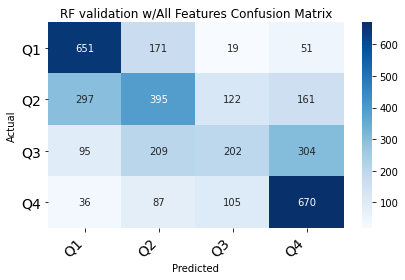

In [37]:
predictions,proba = test_validation_mult(rf_mult, X_ltr, y_ltr_c, X_lho,False,True)
model_name = 'RF validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

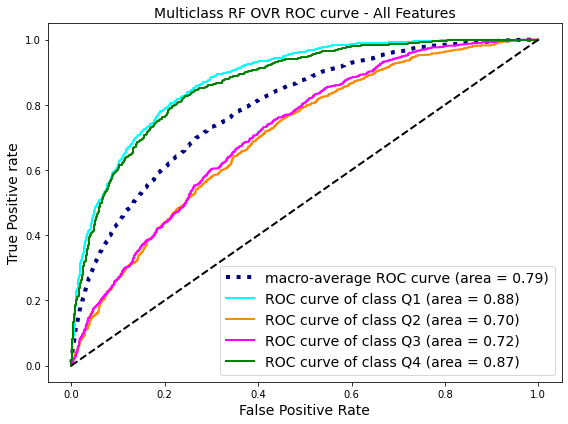

In [38]:
multi_class_auc_plot(rf_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass RF OVR ROC curve - All Features')

Accuracy score : 0.52
AUC score: 0.7841098479751314
F1 score: 0.5143643538254048
Kappa score: 0.35858884736909247


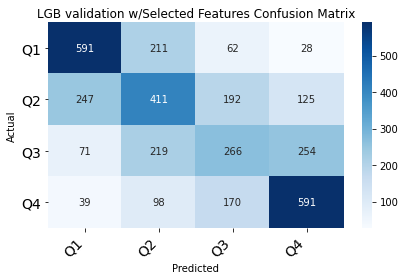

In [39]:
predictions,proba = test_validation_mult(lgbm_mult, X_ltr, y_ltr_c, X_lho,selected_lgb, True)
model_name = 'LGB validation w/Selected Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_nlho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

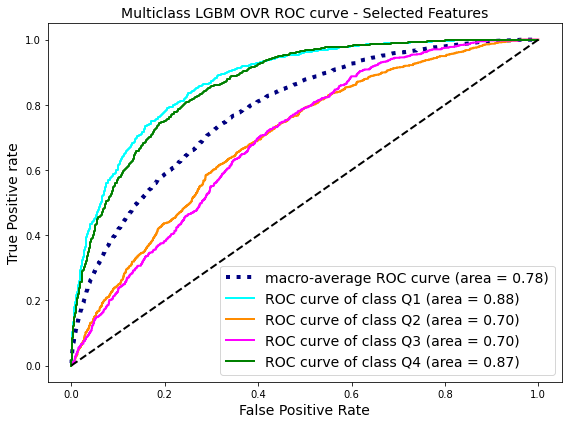

In [40]:
multi_class_auc_plot(lgbm_mult,X_ltr[selected_lgb], y_ltr_c, X_lho[selected_lgb], y_lho_c, title = 'Multiclass LGBM OVR ROC curve - Selected Features')

Accuracy score : 0.5412587412587413
AUC score: 0.7935603776222175
F1 score: 0.5349199045590242
Kappa score: 0.38696556843965335


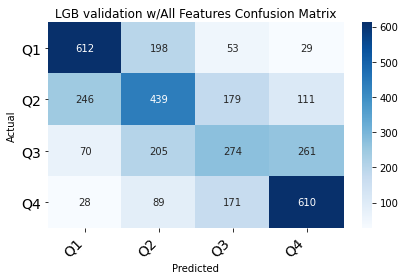

In [41]:
predictions,proba = test_validation_mult(lgbm_mult, X_ltr, y_ltr_c, X_lho,False, True)
model_name = 'LGB validation w/All Features'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_nlho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_nlho_c, predictions)
names =  ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

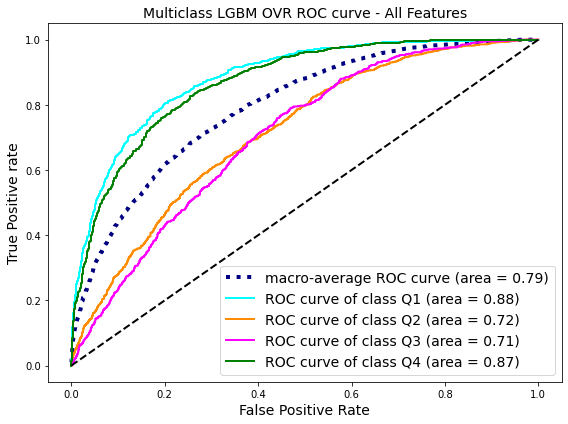

In [42]:
multi_class_auc_plot(lgbm_mult,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass LGBM OVR ROC curve - All Features')

Accuracy score : 0.2511888111888112
AUC score: 0.5
F1 score: 0.10085738987147437
Kappa score: 0.0


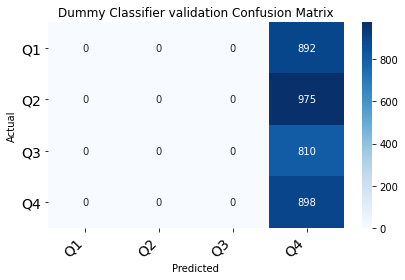

In [43]:
predictions,proba = test_validation_mult(dummy,X_ltr, y_ltr_c, X_lho,False,True)
model_name = 'Dummy Classifier validation'
auc_results[model_name] = roc_auc_score(y_lho_c, proba, multi_class = 'ovr')
f1_results[model_name] = f1_score(y_lho_c, predictions, average = 'weighted')
kappa_results[model_name] = cohen_kappa_score(y_lho_c, predictions)
acc_results[model_name] = accuracy_score(y_lho_c, predictions)
print(f'Accuracy score : {acc_results[model_name]}')
print(f'AUC score: {auc_results[model_name]}')
print(f'F1 score: {f1_results[model_name]}')
print(f'Kappa score: {kappa_results[model_name]}')
matrix = confusion_matrix(y_lho_c, predictions)
names = ['Q1','Q2','Q3','Q4']
fig = print_confusion_matrix(matrix,names, model_name = model_name)
fig.show()

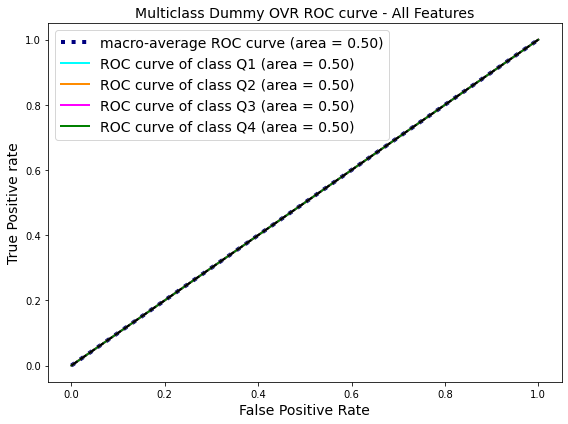

In [44]:
multi_class_auc_plot(dummy,X_ltr, y_ltr_c, X_lho, y_lho_c, title = 'Multiclass Dummy OVR ROC curve - All Features')

## Export Results

In [45]:
class_df = pd.DataFrame.from_dict(classifiers)
class_df['CV_mean_acc']= 0.0
class_df['CV_mean_f1'] = 0.0
class_df['CV_mean_auc'] = 0.0
class_df['CV_mean_kappa'] = 0.0
class_df['CV_sd_acc'] = 0.0
class_df['CV_sd_f1']  = 0.0
class_df['CV_sd_auc'] = 0.0
class_df['CV_sd_kappa'] = 0.0
others= ['LogReg w/Selected Features',    'LogReg w/All Features',
           'RF w/Selected Features',        'RF w/All Features',
          'LGBM w/Selected Features',        'LGBM w/All Features','Dummy Classifier']
for item in others:
    class_df.at[item,'CV_mean_acc'] = round(np.mean(class_df['acc'][item]),4)
    class_df.at[item,'CV_mean_f1']= round(np.mean(class_df['f1'][item]),4)
    class_df.at[item,'CV_mean_auc'] = round(np.mean(class_df['auc'][item]),4)
    class_df.at[item,'CV_mean_kappa'] = round(np.mean(class_df['kappa'][item]),4)
    class_df.at[item,'CV_sd_acc'] = round(np.std(class_df['acc'][item]),4)
    class_df.at[item,'CV_sd_f1'] = round(np.std(class_df['f1'][item]),4)
    class_df.at[item,'CV_sd_auc'] = round(np.std(class_df['auc'][item]),4)
    class_df.at[item,'CV_sd_kappa'] = round(np.std(class_df['kappa'][item]),4)


In [47]:
class_df

,acc,f1,auc,kappa,time,CV_mean_acc,CV_mean_f1,CV_mean_auc,CV_mean_kappa,CV_sd_acc,CV_sd_f1,CV_sd_auc,CV_sd_kappa
LogReg w/Selected Features,"[0.4979020979020979, 0.4888111888111888, 0.502...","[0.4597013372339556, 0.4531960311969274, 0.476...","[0.7595426865561546, 0.7549188112546403, 0.763...","[0.3312621308635222, 0.31826422910568863, 0.33...",4.345550,0.4993,0.4687,0.7565,0.3306,0.0112,0.0139,0.0065,0.0132
LogReg w/All Features,"[0.5020979020979021, 0.4916083916083916, 0.501...","[0.4662971520288557, 0.463109755758897, 0.4746...","[0.7685154879590128, 0.7593423692170704, 0.765...","[0.33631272097704457, 0.32205832485588326, 0.3...",18.621278,0.5030,0.4747,0.7630,0.3355,0.0112,0.0131,0.0047,0.0134
RF w/Selected Features,"[0.4965034965034965, 0.48321678321678324, 0.50...","[0.4798134655407355, 0.46712385207560125, 0.48...","[0.7539602988410614, 0.7587353132041248, 0.760...","[0.32749046037118656, 0.3087942211254129, 0.33...",89.657330,0.5011,0.4871,0.7621,0.3320,0.0098,0.0105,0.0076,0.0126
RF w/All Features,"[0.5468531468531469, 0.5370629370629371, 0.548...","[0.5253940466350988, 0.5232268501293221, 0.534...","[0.7982656363052042, 0.8000728623330925, 0.799...","[0.39490108960118475, 0.38124128230368104, 0.3...",94.475401,0.5482,0.5346,0.8010,0.3954,0.0054,0.0062,0.0057,0.0073
LGBM w/Selected Features,"[0.5384615384615384, 0.5188811188811189, 0.546...","[0.5300455028161778, 0.5135682833369098, 0.538...","[0.8018614350164219, 0.7916009142677345, 0.797...","[0.38390355002895094, 0.35730588983842493, 0.3...",415.872630,0.5344,0.5300,0.7958,0.3779,0.0105,0.0111,0.0052,0.0139
LGBM w/All Features,"[0.5447552447552447, 0.5356643356643357, 0.547...","[0.5354037690029358, 0.5289998404752078, 0.542...","[0.8032836642468066, 0.7998513104908276, 0.803...","[0.3923449286033196, 0.37978379437604104, 0.39...",792.793958,0.5434,0.5393,0.8017,0.3900,0.0053,0.0060,0.0067,0.0070
Dummy Classifier,"[0.25524475524475526, 0.24055944055944056, 0.2...","[0.2555684115924192, 0.2406811466331605, 0.262...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[0.007027321663293673, -0.01266532642738416, 0...",0.175654,0.2490,0.2495,0.5000,-0.0015,0.0108,0.0109,0.0000,0.0144
LR validation w/Selected Features,0.488951,0.46004,0.751307,0.317085,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
LR validation w/All Features,0.496783,0.468898,0.760825,0.327526,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RF validation w/Selected Features,0.494825,0.475573,0.759598,0.32335,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [48]:
class_df.to_csv('class_models/CInc_full/Multiclass/class_cinc4.csv')